In [1]:
from numpy import *
from sys import path
path.append("./Numerov")

In [2]:
from matplotlib import pyplot as plt

%matplotlib nbagg

In [2]:
from specPreProcess import cm_1_to_eV, eV_in_au, hc_in_eVcm

In [4]:
from numerov import eigensolve, integrate, uInnerProd_1d

In [10]:
paramss = load('modelPotUparams/4param/M_Aymar_1991_J_Phys_B_24.npy')

In [11]:
paramss

array([[  4.0099,   2.1315, -13.023 ,   1.6352],
       [  4.2056,   2.0186, -12.658 ,   1.5177],
       [  3.5058,   2.2648, -12.399 ,   1.6187],
       [  3.7741,   3.1848, -13.232 ,   0.715 ]])

In [5]:
params5s = load("modelPotUparams/5param/Feb2.npy")

In [10]:
params5s

array([[ 4.19602,  1.96265, 15.84717, -0.63137,  2.15278],
       [ 2.61699,  2.15351,  6.95429, -0.8493 ,  0.81269],
       [ 2.19293,  3.15277,  9.58607, -0.70067,  1.27284],
       [ 2.36109,  3.53161, 14.27902, -0.15726,  0.8298 ]])

In [10]:
data_ebar = load('specs/CaII_ebar.npz')

In [5]:
datae = load('specs/CaII.npz')

In [6]:
data = datae['0']

In [7]:
allclose(cm_1_to_eV(data['spec/cm_1']),data['energy/eV'])

True

In [8]:
allclose(eV_to_au(data['energy/eV']),data['energy/au'])

True

In [23]:
dt = data.dtype.descr

In [25]:
del dt[1]

In [26]:
new_dtyp = dtype(dt)

In [32]:
for x in new_dtyp.fields:
    print(x)

n
spec/cm_1
energy/eV
energy/au


In [29]:
new_data = empty((data.size,),dtype=new_dtyp)

In [33]:
for field in new_dtyp.fields:
    new_data[field] = data[field]

In [34]:
new_data

array([( 4,     0.  , -11.87171875, -0.43627762),
       ( 5, 52166.93,  -5.4038438 , -0.1985876 ),
       ( 6, 70677.62,  -3.10881076, -0.11424669),
       ( 7, 79448.28,  -2.02138752, -0.07428462),
       ( 8, 84300.89,  -1.41974056, -0.0521745 ),
       ( 9, 87267.86,  -1.05188317, -0.03865599),
       (10, 89214.13,  -0.81057645, -0.02978814)],
      dtype=[('n', '<i4'), ('spec/cm_1', '<f8'), ('energy/eV', '<f8'), ('energy/au', '<f8')])

In [35]:
data_ebar = {}
data_ebar['0'] = new_data

In [36]:
for l in range(1,5):
    print(l)
    data = datae[str(l)]
    assert data['j'][0] == l-0.5 and data['j'][1] == l+0.5
    assert allclose(cm_1_to_eV(data['spec/cm_1']),data['energy/eV']) and allclose(eV_to_au(data['energy/eV']),data['energy/au'])
    assert data.size%2 == 0
    new_data = empty((data.size//2,), dtype=new_dtyp)
    new_data['n'] = data['n'][0::2]
    for field in ['spec/cm_1', 'energy/eV', 'energy/au']:
        new_data[field] = (data[field][1::2]*(l+1) + data[field][0::2]*l)/(2*l+1)
    print(new_data)
    data_ebar[str(l)] = new_data

1
[(4, 25340.10333333, -8.72994638, -0.32081961)
 (5, 60585.19333333, -4.36011218, -0.16023117)
 (6, 74509.47333333, -2.6337215 , -0.09678748)]
2
[( 3, 13686.604, -10.17479614, -0.37391686)
 ( 4, 56850.776,  -4.82312092, -0.17724643)
 ( 5, 72727.45 ,  -2.85466423, -0.10490698)
 ( 6, 80524.308,  -1.88797705, -0.06938188)
 ( 7, 84935.306,  -1.34108301, -0.04928389)
 ( 8, 87673.004,  -1.00165172, -0.03681002)
 ( 9, 89488.65 ,  -0.7765403 , -0.02853733)
 (10, 90754.448,  -0.61960136, -0.02276993)
 (11, 91672.   ,  -0.50583941, -0.01858926)
 (12, 92359.   ,  -0.42066226, -0.01545905)
 (13, 92883.   ,  -0.35569454, -0.01307153)
 (14, 93297.6  ,  -0.3042907 , -0.01118248)
 (15, 93626.9  ,  -0.2634627 , -0.00968208)
 (16, 93894.5  ,  -0.23028453, -0.0084628 )]
3
[( 4, 68056.91, -3.43373739, -0.12618752)
 ( 5, 78034.39, -2.19668754, -0.08072678)
 ( 6, 83458.08, -1.52423569, -0.05601463)
 ( 7, 86727.06, -1.11893382, -0.04112006)
 ( 8, 88847.31, -0.85605633, -0.03145949)
 ( 9, 90300.  , -0.675945

<IPython.core.display.Javascript object>


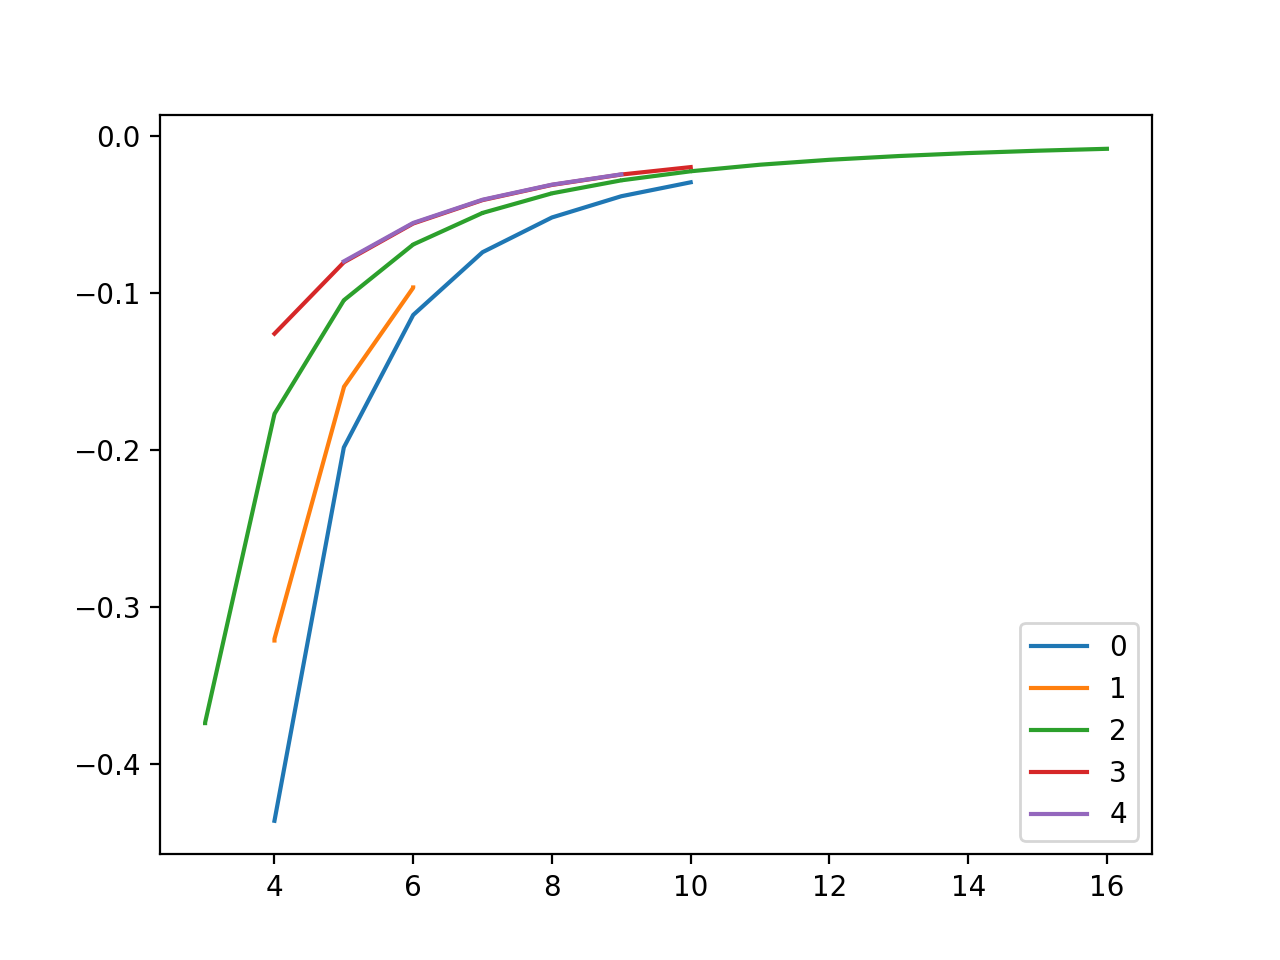

In [40]:
for l in range(5):
    data = datae[str(l)]
    plt.plot(data['n'],data['energy/au'],label=l)
plt.legend()

<IPython.core.display.Javascript object>


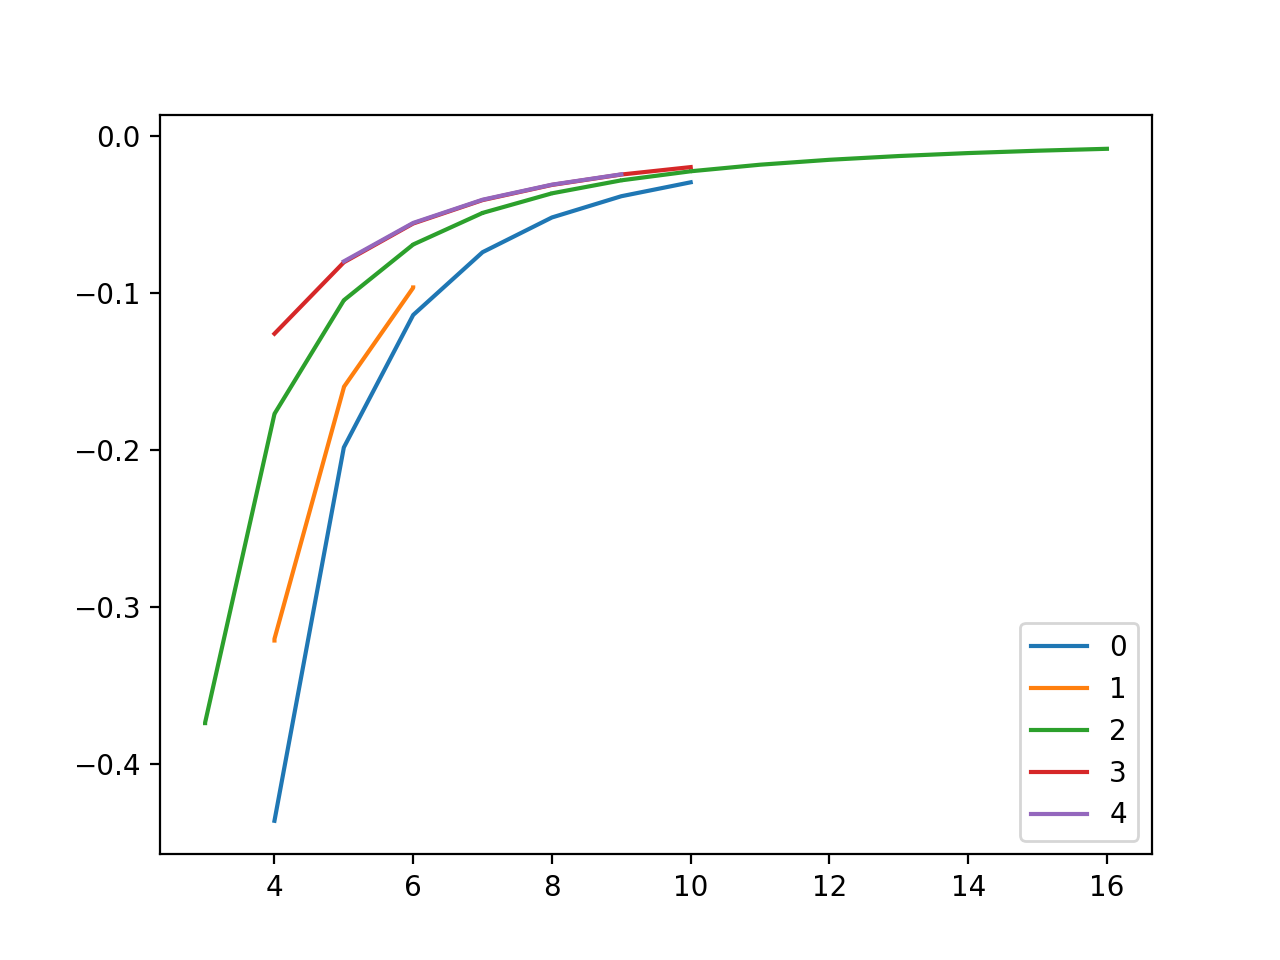

In [40]:
for l in range(5):
    data = datae[str(l)]
    plt.plot(data['n'],data['energy/au'],label=l)
plt.legend()

In [47]:
savez('specs/CaII_ebar.npz',**data_ebar)

In order to estimate $\epsilon_{nl}$, quantum defect parameters are needed

In [6]:
data_ebar = load('specs/CaII_ebar.npz')

<IPython.core.display.Javascript object>


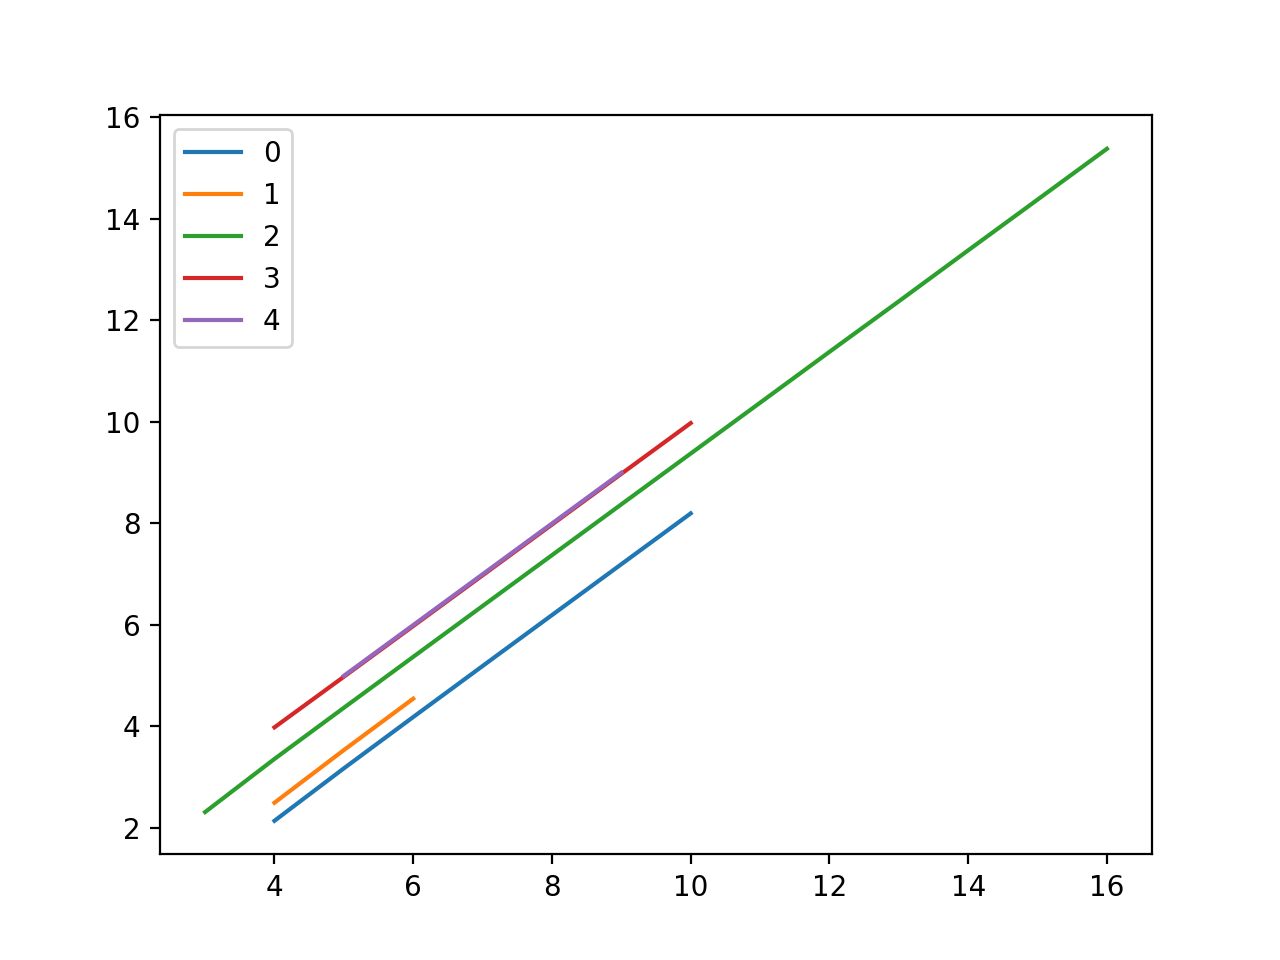

In [8]:
for l in range(5):
    data = data_ebar[str(l)]
    plt.plot(data['n'],2/sqrt(-2*data['energy/au']),label=l)
plt.legend()

In [32]:
def linearRegress(x,y, intercept=False, yerr=None):
    ym = y.mean()
    xm = x.mean()
    N = x.size
    assert N == y.size
    xym = (x*y).mean()
    x2m = (x*x).mean()
    sig_x = x.std()
    slope = (xym-xm*ym)/(sig_x**2)
    rho = (xym-xm*ym) / (sig_x*y.std())
    sgm_slope = abs(slope* sqrt((rho**(-2)-1)/(N-2)))
    if yerr is not None:
        if isinstance(yerr,float):
            yerr =  ones(N)*yerr
        sgm_slope_B = (((((x-xm)*yerr)**2).sum())**0.5) / (N*sig_x**2)
        sgm_slope = (sgm_slope**2+sgm_slope_B**2)**0.5
        yerr_sq_mean = (yerr**2).mean()
    else:
        yerr_sq_mean = 0
    if not intercept:
        return slope, sgm_slope, rho
    else:
        interc = ym-slope*xm
        sgm_interc = ((xm*sgm_slope)**2+yerr_sq_mean)**0.5
        return slope, sgm_slope, rho, interc, sgm_interc
    

In [70]:
e_quant_defects = {}
for l in range(5):
    data = data_ebar[str(l)]
    a,sa,r,b,sb = linearRegress(data['n'],2/sqrt(-2*data['energy/au']),True)
    print(l,r, a,b)
    p1 = poly1d([a,b])
    e_quant_defects[str(l)] = p1

0 0.9999887676204197 1.0073151008614492 -1.870400864537534
1 0.9999782400714865 1.024471995069641 -1.5971814358609944
2 0.999995350583306 1.0022474625232254 -0.6551052924302159
3 0.9999998519291162 0.9986635262382073 -0.015410816514410008
4 0.9999999975885066 0.9997388313411653 -0.002973272765728119


In [83]:
import pickle

In [85]:
pickle.dump?

In [91]:
f = open("specs/ebar_quant_defect.pickle",'wb')
pickle.dump(e_quant_defects,f)
f.close()

In [117]:
data_ebar_ex = {}
dtyp = dtype([('n','i4'),('energy/au','f8'),('if_extrap',bool)])
n_max = 20
for l in range(5):
    n_ = data_ebar[str(l)]['n']
    e_ = data_ebar[str(l)]['energy/au']
    is_extrap = ones((n_max-n_[0],),dtype=bool)
    is_extrap[:n_.size] = False
    new_data = empty((is_extrap.size,),dtype = dtyp)
    new_data['if_extrap'] = is_extrap
    print(n_.size,n_)
    new_data['energy/au'][:n_.size] = e_
    new_data['n'] = arange(n_[0], n_max)
    p1 = e_quant_defects[str(l)]
    new_data['energy/au'][n_.size:] = -2/(p1(new_data['n'][n_.size:])**2)
    data_ebar_ex[str(l)] = new_data

7 [ 4  5  6  7  8  9 10]
3 [4 5 6]
14 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16]
7 [ 4  5  6  7  8  9 10]
5 [5 6 7 8 9]


In [121]:
savez('specs/CaII_ebar_ex.npz',**data_ebar_ex)

In [74]:
e_eig = []
for n in arange(4,30):
    e_est = -2/(e_quant_defects['0'](n)**2)
    e_eig.append(eigensolve(0,-1,e_est,array([2.99731,2.58878,12.70830,-0.40202,0.54644]), 1e-3, 11*2*(11+15),False))

In [78]:
plt.plot(arange(4,30),e_eig,'x')

<IPython.core.display.Javascript object>


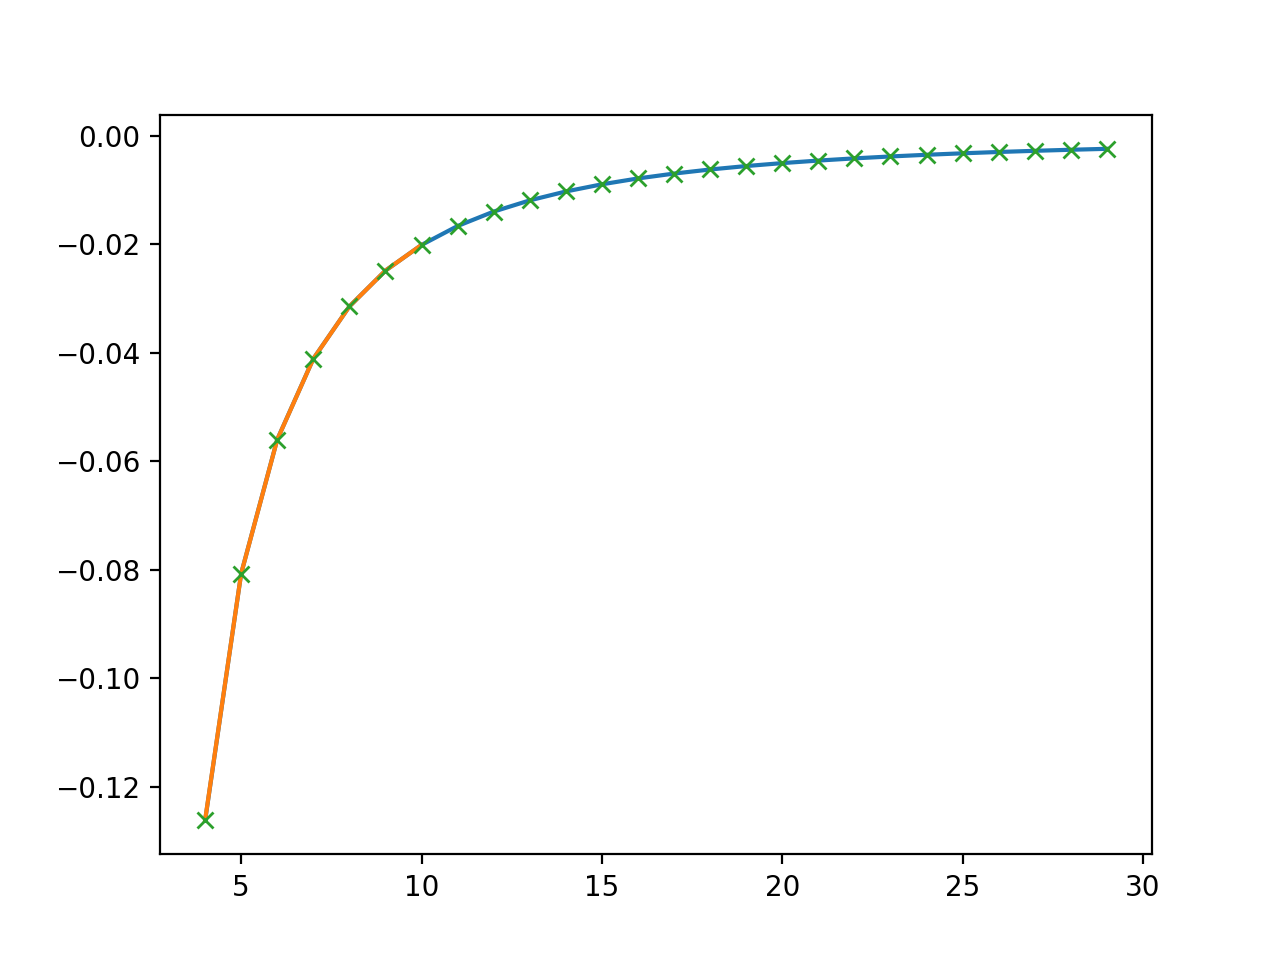

In [209]:
l = 3
n_min = data_ebar[str(l)]['n'][0]
plt.plot(arange(n_min,30), -2/(e_quant_defects[str(l)](arange(n_min,30))**2))
plt.plot(data_ebar[str(l)]['n'], data_ebar[str(l)]['energy/au'])
e_eig = []
for n in arange(n_min,30):
    e_est = -2/(e_quant_defects[str(l)](n)**2)
    e_eig.append(eigensolve(l,-1,e_est,array([2.38524,3.37088,11.14158,0.13348,0.80602]), 1e-3, n*2*(n+15),False))
plt.plot(arange(n_min,30), e_eig,'x')

In [210]:
diff = data_ebar_ex[str(l)]['energy/au'] - array(e_eig[:data_ebar_ex[str(l)]['energy/au'].size])

In [208]:
abs(diff/data_ebar_ex[str(l)]['energy/au'])

array([0.00019508, 0.00022349, 0.00021843, 0.00020741, 0.00020466,
       0.00022945, 0.00017506, 0.00023149, 0.00039538, 0.00054238,
       0.00067398, 0.00079191, 0.00089787, 0.00099336, 0.00107973,
       0.00115812])

In [211]:
abs(diff/data_ebar_ex[str(l)]['energy/au'])

array([8.79818246e-05, 9.17256249e-05, 8.69077807e-05, 8.32970966e-05,
       8.95546151e-05, 1.23172840e-04, 7.68568262e-05, 3.22442656e-04,
       4.79930906e-04, 6.21265450e-04, 7.47848990e-04, 8.61325512e-04,
       9.63297043e-04, 1.05521780e-03, 1.13836542e-03, 1.21384491e-03])

In [20]:
paramss.shape

(4, 4)

In [106]:
data_ebar['0']

array([( 4,     0.  , -11.87171875, -0.43627762),
       ( 5, 52166.93,  -5.4038438 , -0.1985876 ),
       ( 6, 70677.62,  -3.10881076, -0.11424669),
       ( 7, 79448.28,  -2.02138752, -0.07428462),
       ( 8, 84300.89,  -1.41974056, -0.0521745 ),
       ( 9, 87267.86,  -1.05188317, -0.03865599),
       (10, 89214.13,  -0.81057645, -0.02978814)],
      dtype=[('n', '<i4'), ('spec/cm_1', '<f8'), ('energy/eV', '<f8'), ('energy/au', '<f8')])

In [54]:
paramss[0].tolist()

[4.0099, 2.1315, 13.023, 1.6352]

In [51]:
save('modelPotUparams/4param/M_Aymar_1991_J_Phys_B_24.npy', paramss[:-1])

In [181]:
load('specs/CaII_ebar_ex.npz')['4']

array([( 5, -0.08013295, False), ( 6, -0.05564137, False),
       ( 7, -0.04087365, False), ( 8, -0.03128986, False),
       ( 9, -0.02472003, False), (10, -0.02002236,  True),
       (11, -0.01654651,  True), (12, -0.01390304,  True),
       (13, -0.01184592,  True), (14, -0.01021375,  True),
       (15, -0.00889706,  True), (16, -0.00781949,  True),
       (17, -0.00692645,  True), (18, -0.00617811,  True),
       (19, -0.0055448 ,  True)],
      dtype=[('n', '<i4'), ('energy/au', '<f8'), ('if_extrap', '?')])

In [212]:
params5s = array([[4.19602,1.96265,15.84717,-0.63137,2.15278],[2.61699,2.15351,6.95429,-0.84930,0.81269],[2.19293,3.15277,9.58607,-0.70067,1.27284],[2.36109,3.53161,14.27902,-0.15726,0.82980]])

In [214]:
save("modelPotUparams/5param/Feb2.npy",params5s)

In [9]:
params5s = load("modelPotUparams/5param/Feb2.npy")

In [8]:
params5s

array([[ 4.19602,  1.96265, 15.84717, -0.63137,  2.15278],
       [ 2.61699,  2.15351,  6.95429, -0.8493 ,  0.81269],
       [ 2.19293,  3.15277,  9.58607, -0.70067,  1.27284],
       [ 2.36109,  3.53161, 14.27902, -0.15726,  0.8298 ]])

In [216]:
load("modelPotUparams/4param/M_Aymar_1991_J_Phys_B_24.npy")

array([[ 4.0099,  2.1315, 13.023 ,  1.6352],
       [ 4.2056,  2.0186, 12.658 ,  1.5177],
       [ 3.5058,  2.2648, 12.399 ,  1.6187],
       [ 3.7741,  3.1848, 13.232 ,  0.715 ]])

In [221]:
with open("specs/ebar_quant_defect.pickle",'rb') as f:
    ebar_qd = pickle.load(f)

In [222]:
ebar_qd

{'0': poly1d([ 1.0073151 , -1.87040086]),
 '1': poly1d([ 1.024472  , -1.59718144]),
 '2': poly1d([ 1.00224746, -0.65510529]),
 '3': poly1d([ 0.99866353, -0.01541082]),
 '4': poly1d([ 0.99973883, -0.00297327])}

In [7]:
n = data_ebar['0']['n'][0]

In [8]:
ui_,ri_ = integrate(0,-1,data_ebar['0']['energy/au'][0],params5s[0], 1e-6, n*2*(n+15), 1e-3,1e-8,0)

<IPython.core.display.Javascript object>


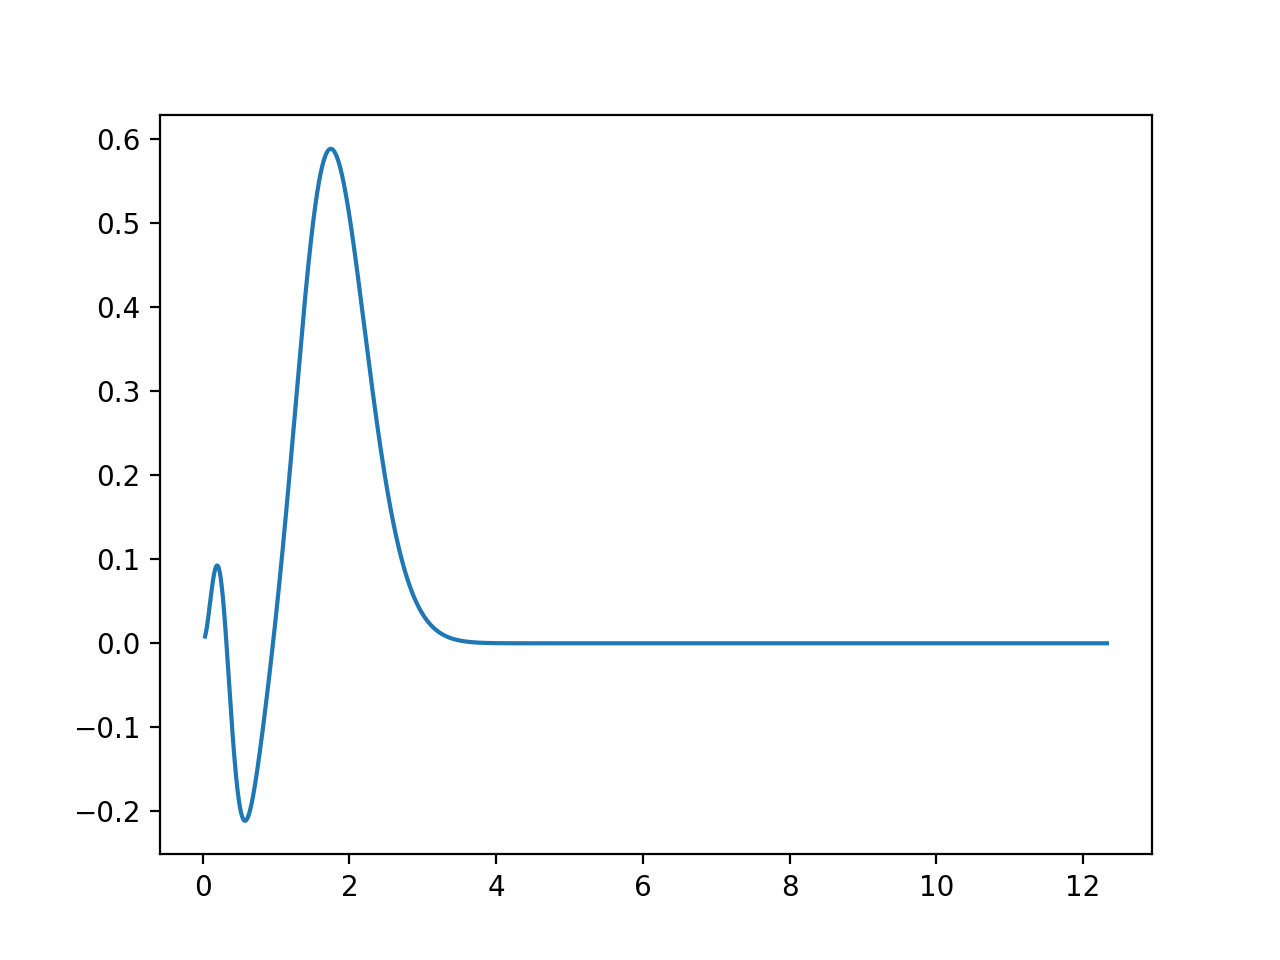

In [12]:
plt.plot(ri_**0.5,ui_)

In [8]:
e,u_,r_ = eigensolve(0,-1,data_ebar['0']['energy/au'][0],params5s[0], 1e-3, n*2*(n+15), True)

<IPython.core.display.Javascript object>


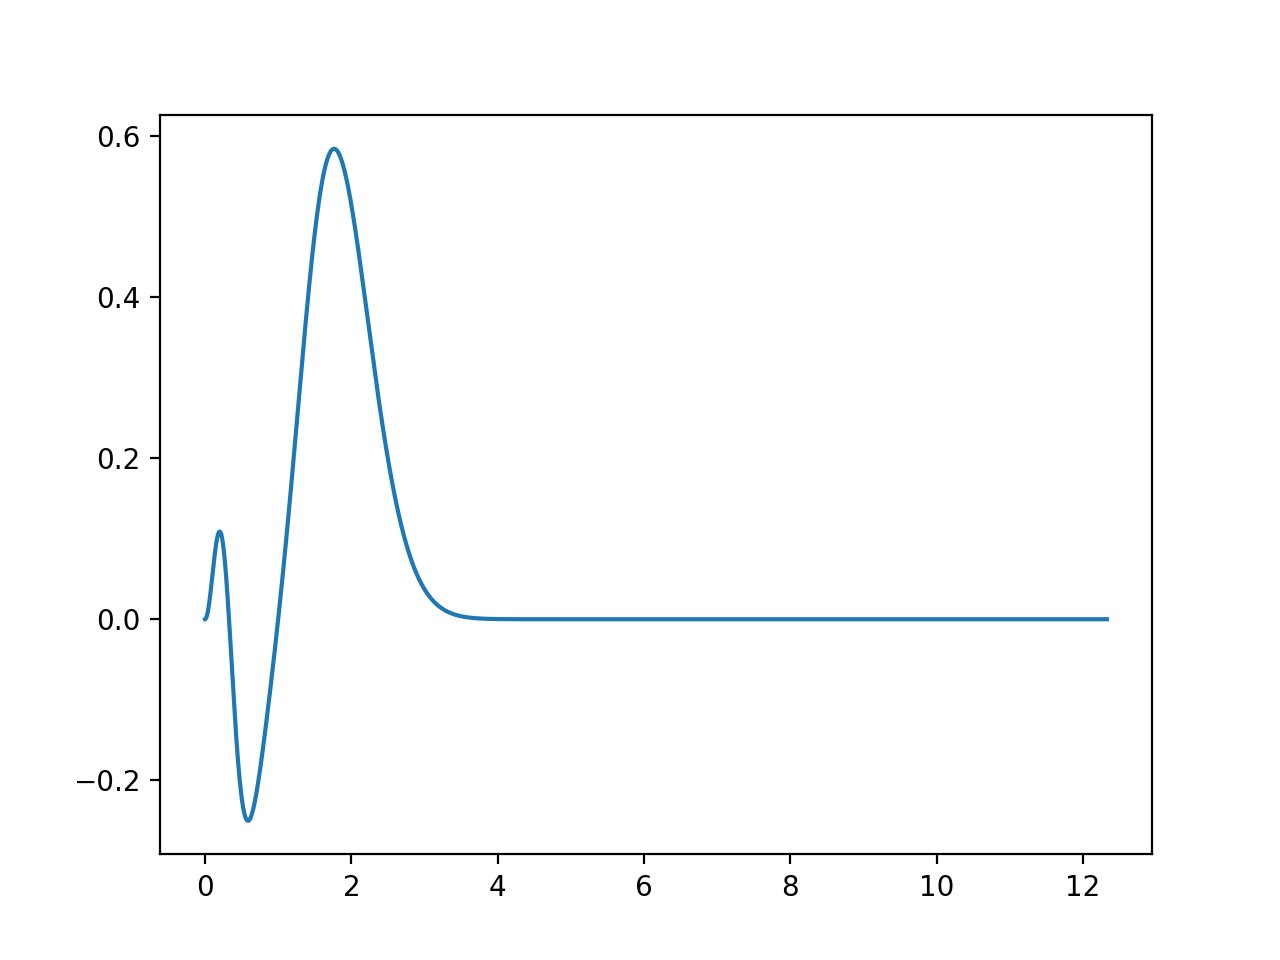

In [10]:
plt.plot(r_**0.5,u_)

In [13]:
trapz(u_**2,r_)

1.0000000000000062

In [15]:
uInnerProd(u_,r_,u_,r_)

1.0

In [9]:
uInnerProd_1d(u_,r_,u_,r_)

1.0

In [15]:
trapz(ui_**2,ri_)

0.9999999999973449

In [11]:
uInnerProd_1d(ui_,ri_,ui_,ri_)

0.9999999999999981

In [23]:
uip = []
rmin_ = array([1e-6,1e-5,1e-4,1e-3,5e-3,1e-2,5e-2])
for rmin in rmin_:
    ui_,ri_ = integrate(0,-1,data_ebar['0']['energy/au'][0],params5s[0], rmin, n*2*(n+15), 1e-3,1e-8,0)
    uip.append(uInnerProd(u_,r_,ui_,ri_))

<IPython.core.display.Javascript object>


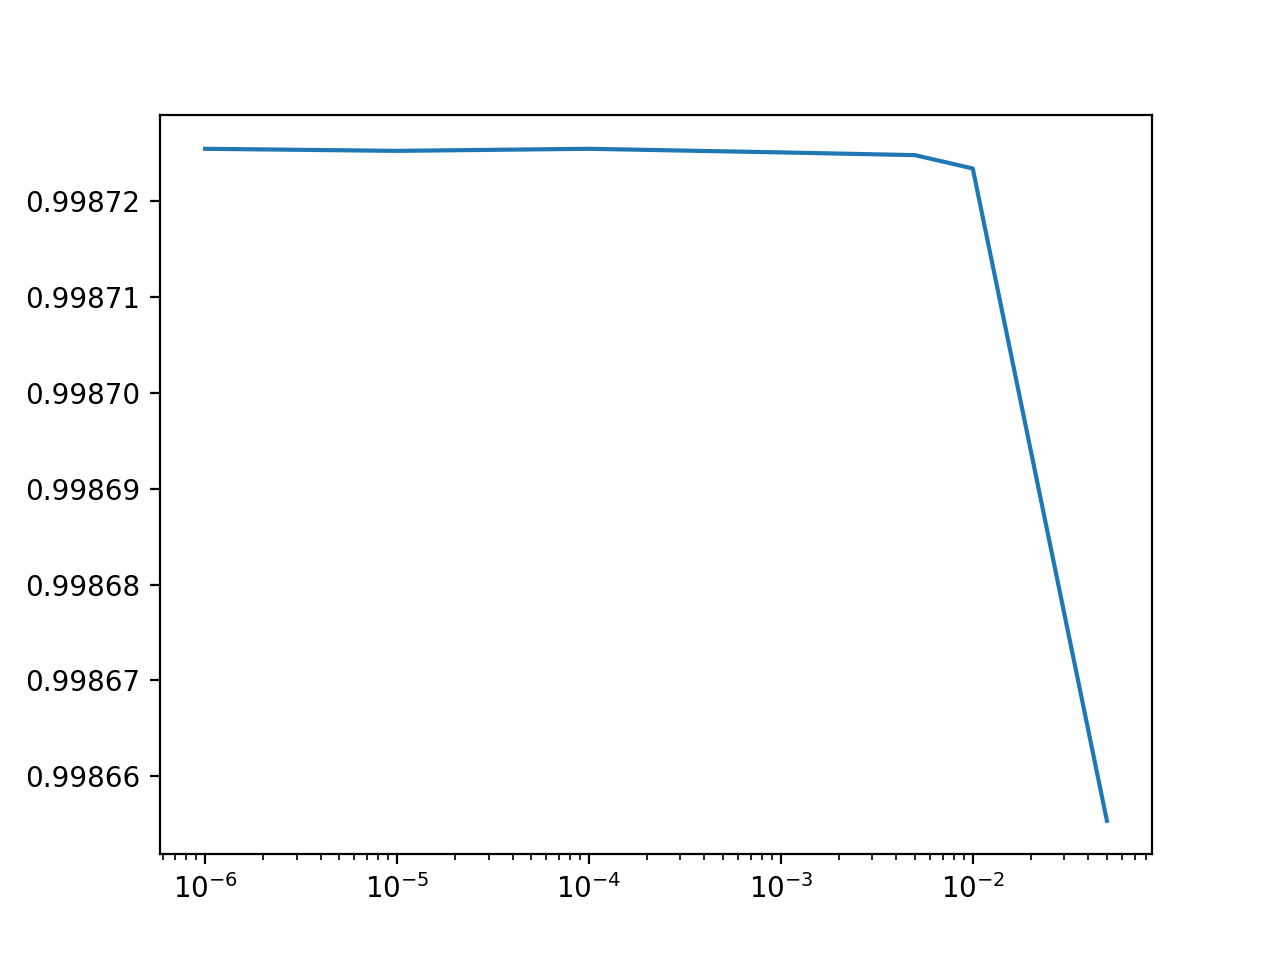

In [26]:
plt.plot(rmin_,uip)
plt.xscale('log')

In [13]:
uip = []
dx_ = array([1e-4,3e-4,1e-3,3e-3,5e-3,8e-3,1e-2,2e-2,3e-2,5e-2,1e-1])
for dx in dx_:
    ui_,ri_ = integrate(0,-1,data_ebar['0']['energy/au'][0],params5s[0], 1e-3, n*2*(n+15), dx,1e-8,0)
    uip.append(uInnerProd_1d(u_,r_,ui_,ri_))

<IPython.core.display.Javascript object>


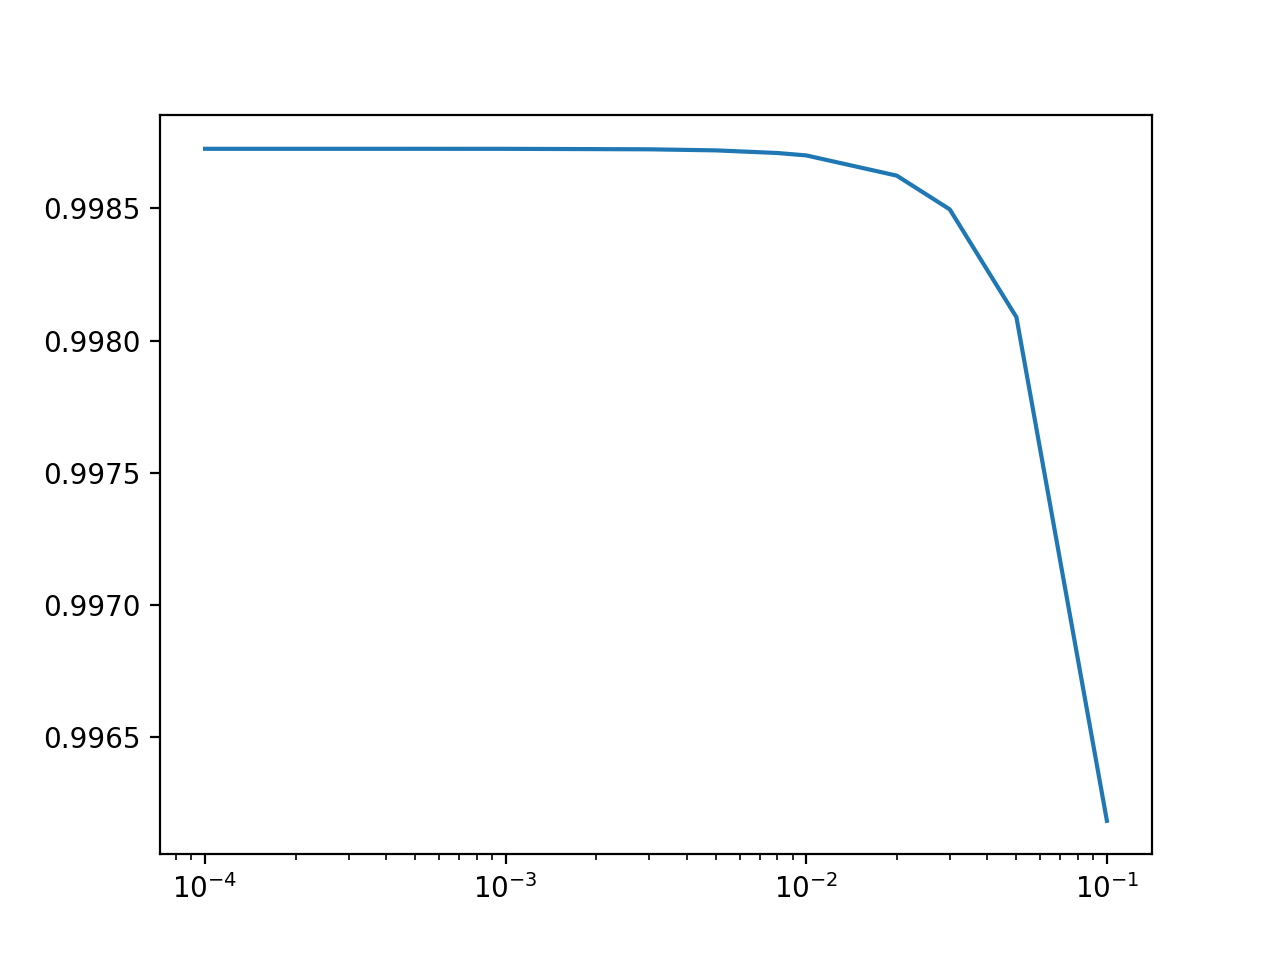

In [14]:
plt.plot(dx_,uip)
plt.xscale('log')

so take rmin=1e-3 in numerov.integrate henceforth

In [19]:
uInnerProd_py(u_,r_,ui_,ri_)

0.9987254947992933

In [20]:
uInnerProd_1e(ui_,ri_,u_,r_)

0.9987254947992933

In [18]:
def uInnerProd_py(u1, r1, u2, r2):
    k1, k2 = (0,0)
    res = 0
    last_prod = 0
    last_r = 0
    r1_last, r2_last = (0,0)
    u1_last, u2_last = (0,0)
    while k1 < u1.size and k2 < u2.size:
#         print(k1,k2)
        if r1[k1] <= r2[k2]:
#             print("k1")
            prod = u1[k1]* (u2[k2] + (u2_last-u2[k2])/(r2_last-r2[k2])*(r1[k1]-r2[k2]))
#             print(prod)
            res += (r1[k1]-last_r)*0.5*(prod + last_prod)
            r1_last = r1[k1]
            u1_last = u1[k1]
            k1 += 1
            last_r = r1_last
        else:
#             print("k2")
            prod = u2[k2]* (u1[k1] + (u1_last-u1[k1])/(r1_last-r1[k1])*(r2[k2]-r1[k1]))
#             print(prod)
            res += (r2[k2]-last_r)*0.5*(prod + last_prod)
            r2_last = r2[k2]
            u2_last = u2[k2]
            k2 += 1
            last_r = r2_last
        last_prod = prod
#         print(res)
    return res

In [21]:
%timeit uInnerProd_py(ui_,ri_,u_,r_)

39.5 ms ± 455 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit uInnerProd_1e(ui_,ri_,u_,r_)

188 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
data_ebar['2']

array([( 3, 13686.604, -10.17479614, -0.37391686),
       ( 4, 56850.776,  -4.82312092, -0.17724643),
       ( 5, 72727.45 ,  -2.85466423, -0.10490698),
       ( 6, 80524.308,  -1.88797705, -0.06938188),
       ( 7, 84935.306,  -1.34108301, -0.04928389),
       ( 8, 87673.004,  -1.00165172, -0.03681002),
       ( 9, 89488.65 ,  -0.7765403 , -0.02853733),
       (10, 90754.448,  -0.61960136, -0.02276993),
       (11, 91672.   ,  -0.50583941, -0.01858926),
       (12, 92359.   ,  -0.42066226, -0.01545905),
       (13, 92883.   ,  -0.35569454, -0.01307153),
       (14, 93297.6  ,  -0.3042907 , -0.01118248),
       (15, 93626.9  ,  -0.2634627 , -0.00968208),
       (16, 93894.5  ,  -0.23028453, -0.0084628 )],
      dtype=[('n', '<i4'), ('spec/cm_1', '<f8'), ('energy/eV', '<f8'), ('energy/au', '<f8')])

In [10]:
eigensolve(2,-1,data_ebar['2']['energy/au'][0], params5s, 1e-2, 3*2*(3+15), False)

-0.21266354878989913

In [33]:
ui,ri = integrate(0,-1,data_ebar['0']['energy/au'][0], params5s[0], 1e-4, 4*2*(4+15), 1e-2, 1e-8,0)

In [34]:
e, ue, re = eigensolve(0,-1,data_ebar['0']['energy/au'][0], params5s[0], 1e-2, 4*2*(4+15), True)

<IPython.core.display.Javascript object>


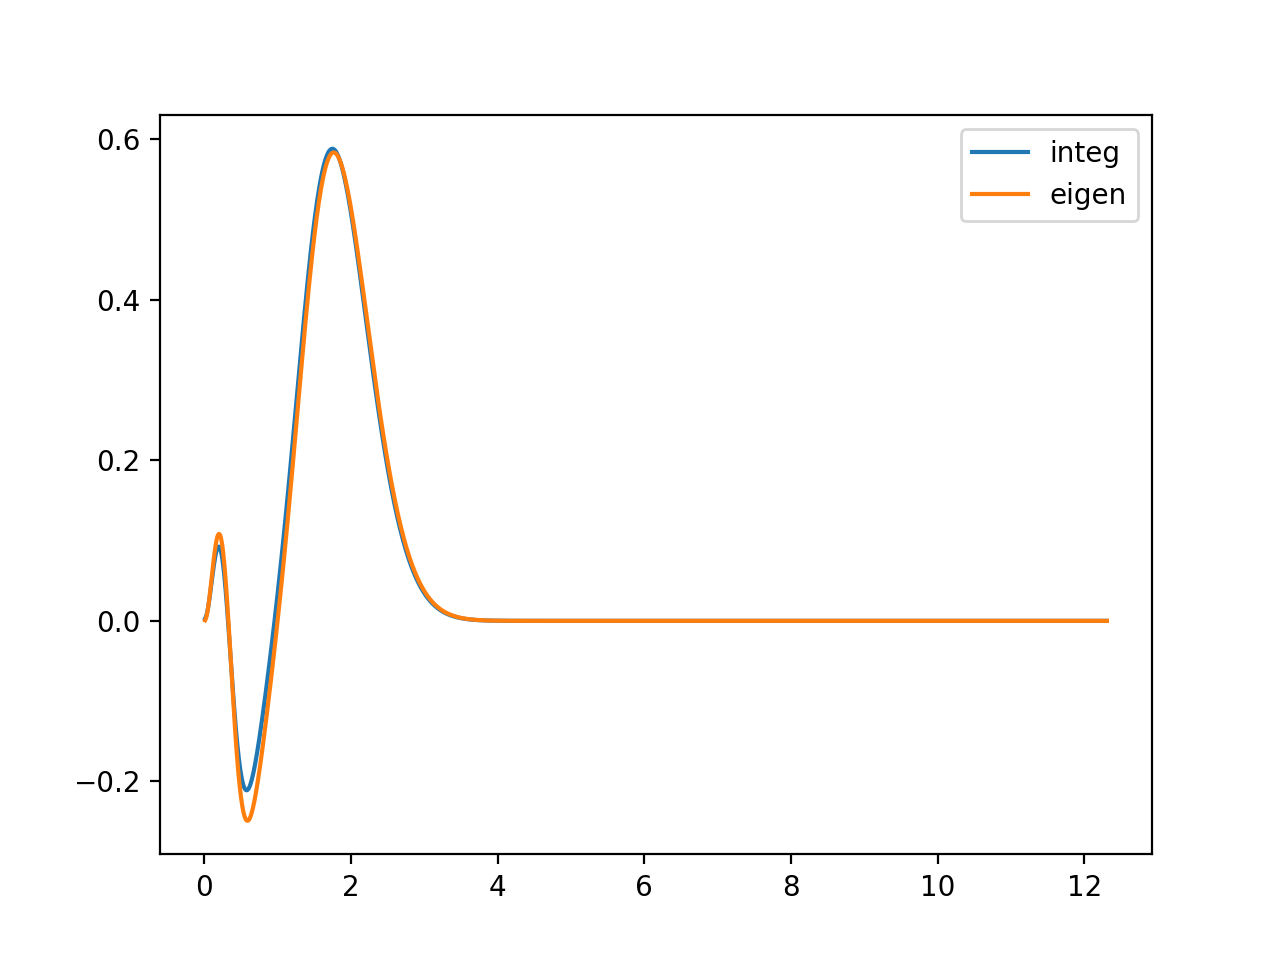

In [35]:
plt.plot(ri**0.5,ui,label='integ')
plt.plot(re**0.5,ue,label='eigen')
plt.legend()

In [36]:
np.argwhere((ui[:-1]<0)*(ui[1:]>0)), np.argwhere((ui[:-1]>0)*(ui[1:]<0))

(array([[94]]), array([[31]]))

In [37]:
np.argwhere((ue[:-1]<0)*(ue[1:]>0)), np.argwhere((ue[:-1]>0)*(ue[1:]<0))

(array([[98]]), array([[31]]))

In [12]:
cd Numerov/

/Users/congzlwag/Git/CaAtomSpec/Dev/Numerov


<IPython.core.display.Javascript object>


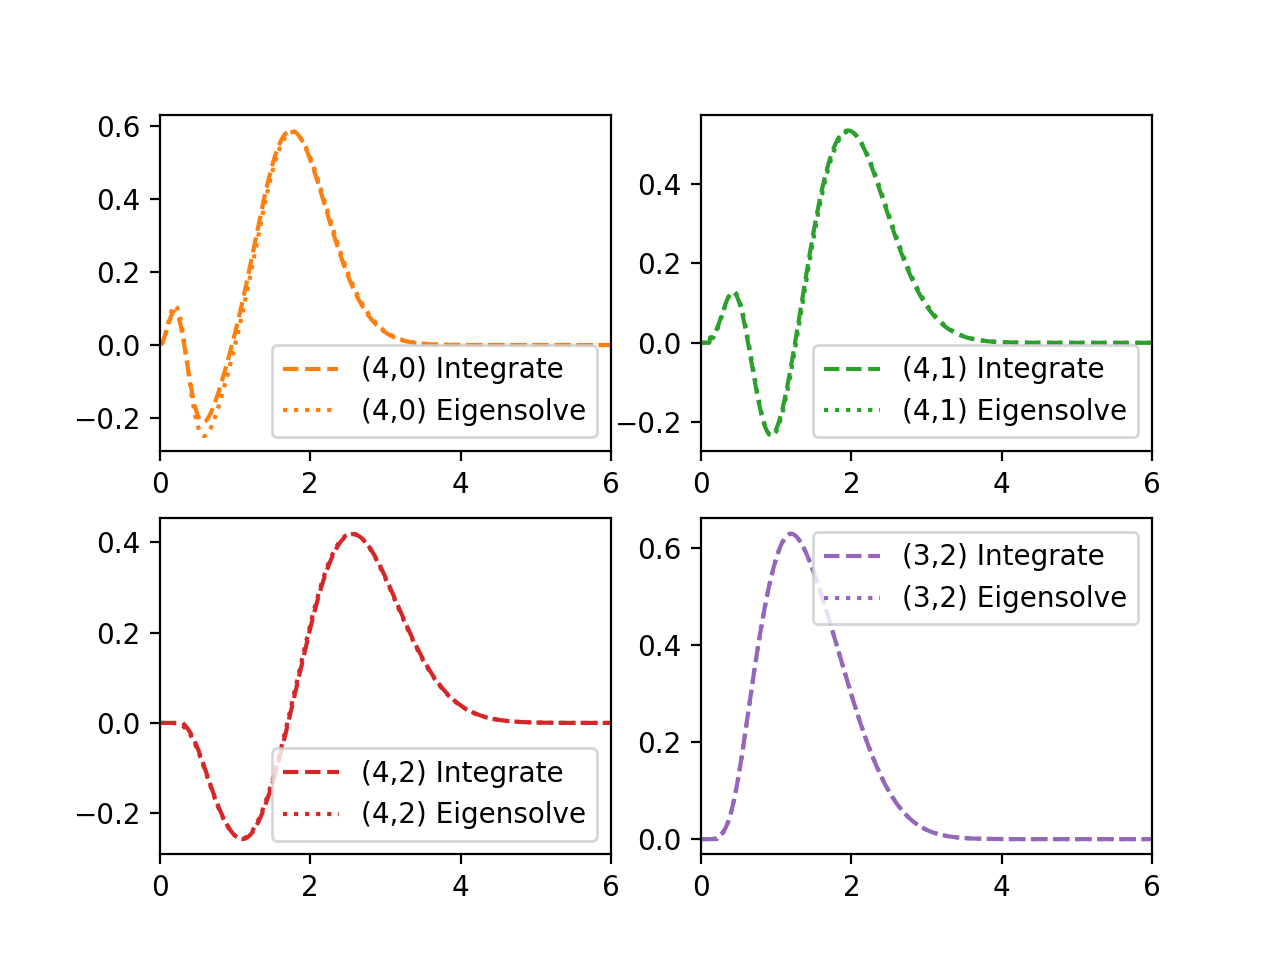

In [25]:
%run low_r_diverge_test.py

In [30]:
u,r = request_ur(4,1)

In [32]:
np.argwhere((u[:-1]<0)*(u[1:]>0)), np.argwhere((u[:-1]>0)*(u[1:]<0))

(array([[124]]), array([[61]]))

In [38]:
e1, ue1, re1 = eigensolve(0,-1,data_ebar['0']['energy/au'][1], params5s[0], 1e-2, 5*2*(5+15), True)

<IPython.core.display.Javascript object>


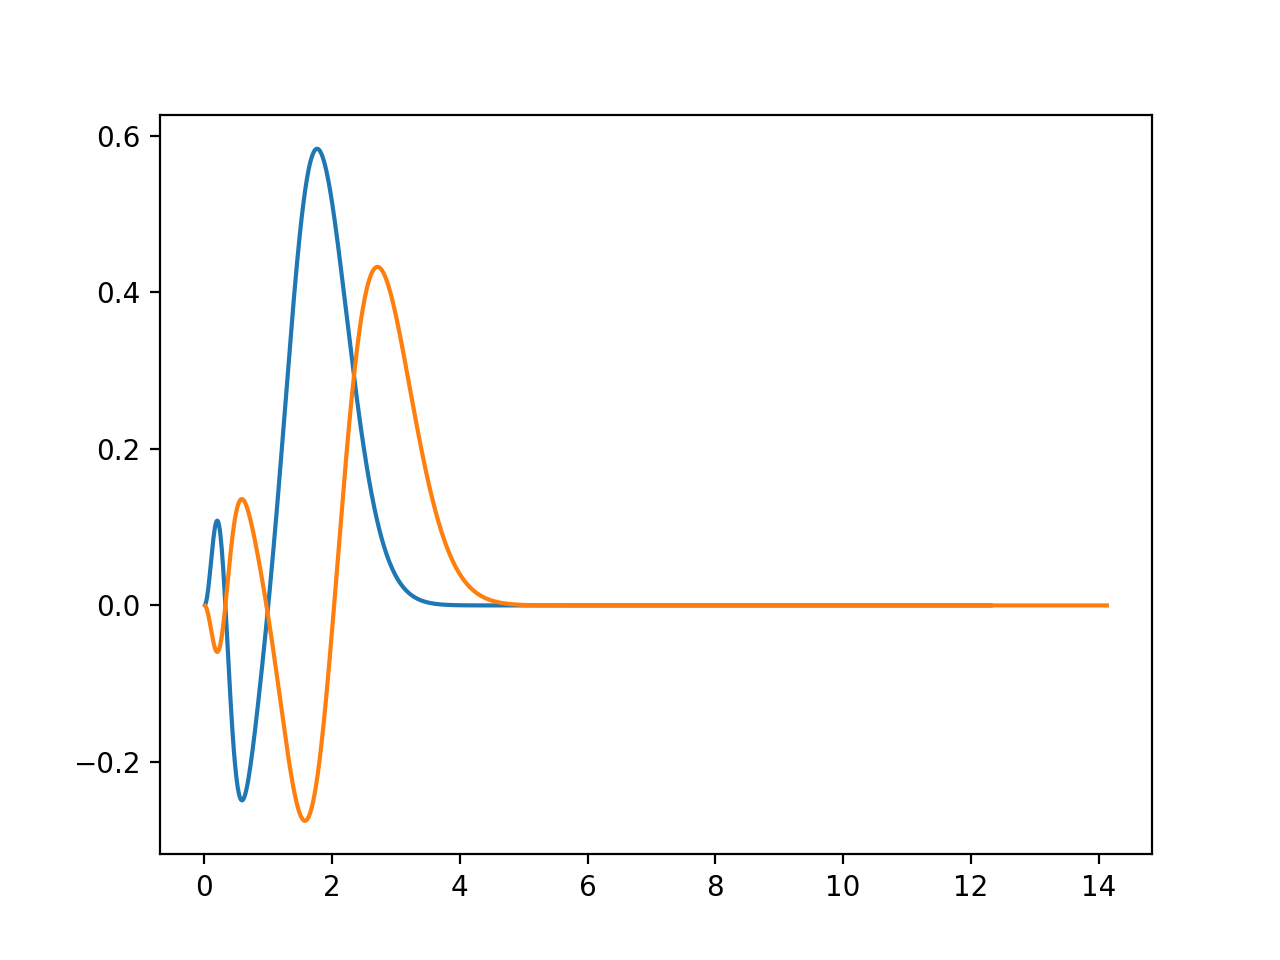

In [39]:
plt.plot(re**0.5, ue)
plt.plot(re1**0.5,ue1)

In [40]:
uInnerProd_1d(ue1,re1,ue,re)

9.63617045681042e-13

In [41]:
ui1,ri1 = integrate(0,-1,data_ebar['0']['energy/au'][1], params5s[0], 1e-4, 5*2*(5+15), 1e-2, 1e-8,0)

<IPython.core.display.Javascript object>


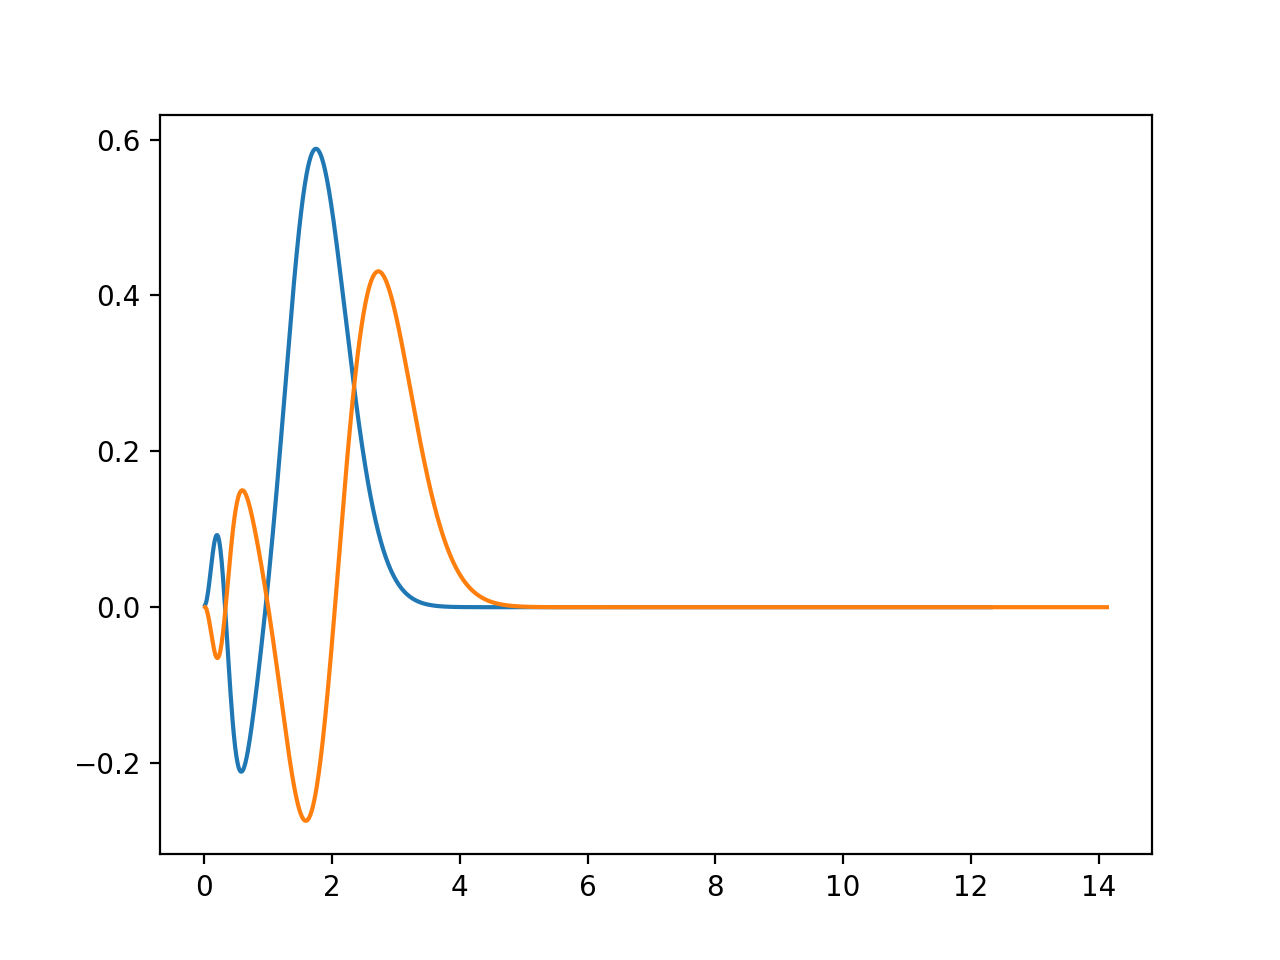

In [42]:
plt.plot(ri**0.5, ui)
plt.plot(ri1**0.5,ui1)

In [43]:
uInnerProd_1d(ui,ri,ui1,ri1)

-0.030555641161920756

CaI energy level data processing

In [5]:
load('specs/CaII.npz')['0']

array([( 4, 0.5,     0.  , -11.87171875, -0.43627762),
       ( 5, 0.5, 52166.93,  -5.4038438 , -0.1985876 ),
       ( 6, 0.5, 70677.62,  -3.10881076, -0.11424669),
       ( 7, 0.5, 79448.28,  -2.02138752, -0.07428462),
       ( 8, 0.5, 84300.89,  -1.41974056, -0.0521745 ),
       ( 9, 0.5, 87267.86,  -1.05188317, -0.03865599),
       (10, 0.5, 89214.13,  -0.81057645, -0.02978814)],
      dtype=[('n', '<i4'), ('j', '<f4'), ('spec/cm_1', '<f8'), ('energy/eV', '<f8'), ('energy/au', '<f8')])

In [55]:
def castPDdtframe(raw_arr):
    dct = {}
    pt = 0
    while pt<raw_arr.shape[0]:
        pte = pt+1
        e_config = raw_arr[pt,:4]
        while pte < raw_arr.shape[1] and (raw_arr[pte,:4]==e_config).all():
            pte += 1
        e_config = tuple(e_config.astype(uint8))
        dct[e_config] = empty((pte-pt,),dtype=[("J",'i4'),('spec/cm_1','f8'),('energy/eV','f8'),('energy/au','f8')])
        dct[e_config]['J'] = raw_arr[pt:pte,4]
        dct[e_config]['spec/cm_1'] = raw_arr[pt:pte,5]
        dct[e_config]['energy/eV'] = cm_1_to_eV(raw_arr[pt:pte,5],'CaI')
        dct[e_config]['energy/au'] = eV_in_au * dct[e_config]['energy/eV']
        pt = pte
    return dct

In [6]:
data = {}

In [57]:
data[(0,0)]= castPDdtframe(array([[4,0,4,0,0,0],
                                  [4,0,5,0,0,33317.264],
                                  [4,0,6,0,0,40690.435],
                                  [4,1,4,1,0,41786.276],
                                  [4,0,7,0,0,44276.538],
                                  [4,0,8,0,0,45887.200],
                                  [4,0,9,0,0,46835.055],
                                  [4,0,10,0,0,47437.471],
                                  [4,0,11,0,0,47843.76],
                                  [4,0,12,0,0,48130.75],
                                  [4,0,13,0,0,48340.75],
                                  [4,0,14,0,0,48499.14],
                                  [4,0,15,0,0,48621.53],
                                  [4,0,16,0,0,48718.02],
                                  [4,0,17,0,0,48795.46],
                                  [4,0,18,0,0,48858.59],
                                  [4,0,19,0,0,48910.65],
                                  [4,0,20,0,0,48954.13]]))

In [21]:
data[(1,0)] = castPDdtframe(array([[4,0,4,1,1,23652.304],
                                   [4,0,5,1,1,36731.615],
                                   [4,0,6,1,1,41679.008],
                                   [3,2,4,1,1,43933.477],
                                   [4,0,7,1,1,45425.358],
                                   [4,0,8,1,1,46479.813],
                                   [4,0,9,1,1,47184.370],
                                   [4,0,10,1,1,47662.10],
                                   [4,0,11,1,1,47997.49],
                                   [4,0,12,1,1,48240.53],
                                   [4,0,13,1,1,48422.09],
                                   [4,0,14,1,1,48561.10],
                                   [4,0,15,1,1,48669.83],
                                   [4,0,16,1,1,48756.45],
                                   [4,0,17,1,1,48826.54],
                                   [4,0,18,1,1,48884.06],
                                   [4,0,19,1,1,48931.82],
                                   [4,0,20,1,1,48971.93]]))

In [56]:
data[(2,0)] = castPDdtframe(array([[4,0,3,2,2,21849.634],
                                   [4,0,4,2,2,37298.287],
                                   [4,0,5,2,2,42919.053],
                                   [4,0,6,2,2,44989.830],
                                   [4,0,7,2,2,46200.13],
                                   [4,0,8,2,2,46948.98],
                                   [4,0,9,2,2,47812.39],
                                   [4,0,10,2,2,48083.41],
                                   [4,0,11,2,2,48290.85],
                                   [4,0,12,2,2,48451.73],
                                   [4,0,13,2,2,48578.32],
                                   [4,0,14,2,2,48678.97],
                                   [4,0,15,2,2,48760.14],
                                   [4,0,16,2,2,48827.05],
                                   [4,0,17,2,2,48882.37],
                                   [4,0,18,2,2,48928.79],
                                   [4,0,19,2,2,48968.10],
                                   [4,0,20,2,2,49001.66]]))

In [58]:
import pickle

In [59]:
with open("specs/CaI.pickle",'wb') as fp:
    pickle.dump(data,fp)

In [60]:
ls specs

CaI.pickle                CaII_ebar.npz             ebar_quant_defect.pickle
CaII.npz*                 CaII_ebar_ex.npz


In [9]:
from annealingModelParams import Loss

In [11]:
data_ebar['0']

array([( 4,     0.  , -11.87171875, -0.43627762),
       ( 5, 52166.93,  -5.4038438 , -0.1985876 ),
       ( 6, 70677.62,  -3.10881076, -0.11424669),
       ( 7, 79448.28,  -2.02138752, -0.07428462),
       ( 8, 84300.89,  -1.41974056, -0.0521745 ),
       ( 9, 87267.86,  -1.05188317, -0.03865599),
       (10, 89214.13,  -0.81057645, -0.02978814)],
      dtype=[('n', '<i4'), ('spec/cm_1', '<f8'), ('energy/eV', '<f8'), ('energy/au', '<f8')])

In [14]:
paramss

array([[  4.0099,   2.1315, -13.023 ,   1.6352],
       [  4.2056,   2.0186, -12.658 ,   1.5177],
       [  3.5058,   2.2648, -12.399 ,   1.6187],
       [  3.7741,   3.1848, -13.232 ,   0.715 ]])

In [18]:
for l in range(4):
    print(Loss(l,data_ebar[str(l)]['n'],None,data_ebar[str(l)]['energy/au'],paramss[l]))

0.002182551947226118
0.0026659412558017494
0.0061080173278105715
0.0008017072029914701


In [19]:
l = 4
Loss(l,data_ebar[str(l)]['n'],None,data_ebar[str(l)]['energy/au'],paramss[l-1])

5.806447506603231e-07